# Feature Scaling and Normalization

## About Standardization

The result of standardization (or Z-score normalization) is that the features will be rescaled so that
they'll have the properties of a standard normal distribution with 

$$
\mu = 0 \text{ and }\sigma = 1
$$ 

Where
$\mu$ is the mean (average) and $\sigma$ is that standard deviation from the mean; standard scores
(also called z scores) of the samples are calculated as follows:

$$
z = \frac{x-\mu}{\sigma}
$$

Standardizing the features is a general requirement for many machine learning algorithms. Think of gradient descent 
as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptions, neural networks etc.);
with features being on different scales, certain weights may update faster than others since the feature values 
$x_j$ play a role in the weight updates

$$
\Delta w_j = -\eta\frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)}-o^{(i)})x_j^{(i)}
$$

so that 
$w_j := w_j + \Delta w_j$, where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output.
Some examples of algorithms where feature scaling matters are:
- k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization,
otherwise some weights will update much faster than others.
- linear discriminant analysis, principal component analysis, kernal principal component analysis since you want to find
directions of maximizing the variance

In addition, we'd also want to think about whether we want to "standardize" or "normalize" our data. As a rule of thumb I'd say: 
When in doubt, just standardize the data, it shouldn't hurt.

## About Min-Max Scaling

An alternative approach to Z-score normalization is the so-called Min-Max scaling (often called "normalization").
In this approach, the data is scaled to a fixed range-usually 0 to 1. The cost is that we will end up with smaller 
standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$
X_{\text{norm}} = \frac{X - X_{ \text{min}} }{ X_{\text{max}} - X_{\text{min}} }
$$

## Z-score standardization or Min-Max scaling?

There is no obvious answer to this question:

For example, in clustering analysis, standardization may be especially crucial in order to compare similarities
between features based on certain distance measures. Another prominent example is PCA, where we usually prefer 
standardization over Min-Max scaling, since we are intrested in the components that maximize the variance.

## Standardizing and normalizing-how it can be done using scikit-learn

For the following examples and discussion, we will have a look at the free "Wine" Dataset that is deposited on the
UCI machine learning repository (http://archive.ics.uci.edu/ml/datasets/Wine). 

The Wine dataset consists of 3 different classes where each row corresponds to a particular wine sample.

The class labels (1,2,3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes:

### Loading the wine dataset

In [2]:
import pandas as pd
import numpy as numpy
from sklearn import datasets

In [3]:
data = datasets.load_wine()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

The features **Alcohol**(percent/volume) and **Malic acid**(g/l) are measured on different scales, so that 
**Feature Scaling** is important prior to any comparison or combination of these data.

In [4]:
rel_cols = ['target', 'alcohol', 'malic_acid']
df = df[rel_cols]
df.head()

,target,alcohol,malic_acid
0,0,14.23,1.71
1,0,13.20,1.78
2,0,13.16,2.36
3,0,14.37,1.95
4,0,13.24,2.59


### Standardization and Min-Max scaling

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaling_cols =  ['alcohol', 'malic_acid']

std_scale = StandardScaler().fit(df[scaling_cols])
df_std = std_scale.transform(df[scaling_cols])

minmax_scale = MinMaxScaler().fit(df[scaling_cols])
df_minmax = minmax_scale.transform(df[scaling_cols])

In [6]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
        .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
        .format(df_std[:,0].std(), df_std[:,1].std()))


Mean after standardization:
Alcohol=0.00, Malic acid=0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [7]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
        .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
        .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


### Plotting

In [8]:
%matplotlib inline

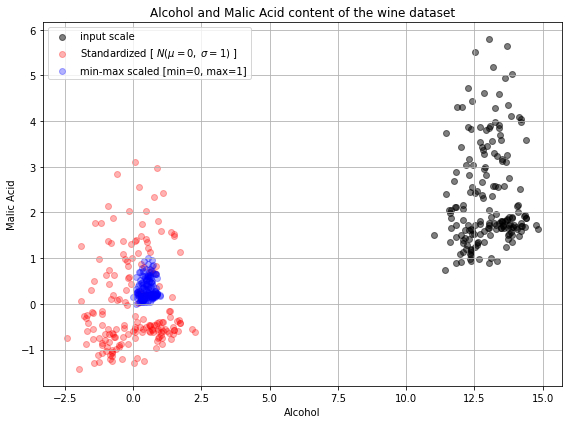

In [10]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['alcohol'], df['malic_acid'],
            color="black", label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1],
            color="red", label='Standardized [ $N (\mu=0, \; \sigma=1)$ ]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color="blue", label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

The plot above includes the wine datapoints on all three different scales: 
- The input scale where the alcohol content was measured in volume-percent (green) 
- The standardized features (red)
- The normalized features (blue)

In the following plot, we will zoom on into the three different axis-scales.

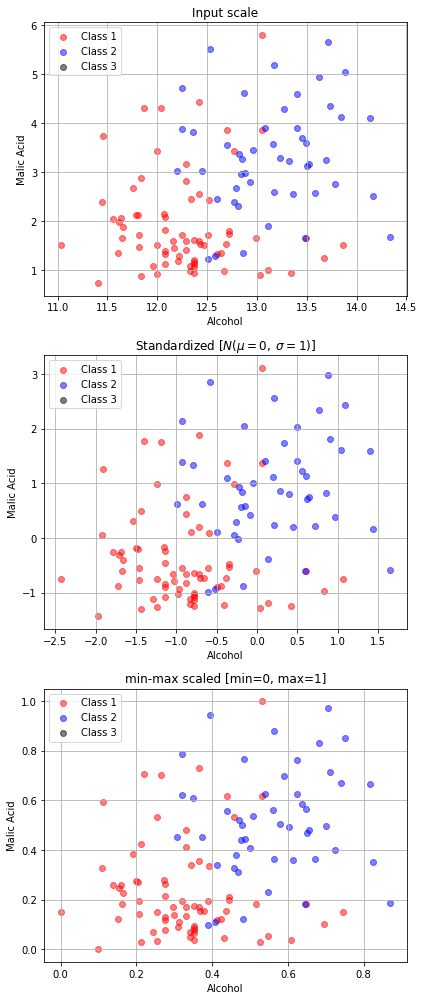

In [11]:
fig, ax = plt.subplots(3, figsize=(6, 14))

for a,d,l in zip(
        range(len(ax)),
        (df[['alcohol', 'malic_acid']].values, df_std, df_minmax),
        ('Input scale',
         'Standardized [$N (\mu=0, \; \sigma=1)$]',
         'min-max scaled [min=0, max=1]')):
    for i,c in zip(range(1,4), ('red', 'blue', 'black')):
        ax[a].scatter(
                    d[df['target'].values == i, 0],
                    d[df['target'].values == i, 1],
                    alpha=0.5,
                    color=c,
                    label='Class %s' %i
        )
    
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()

## The effect of standardization on PCA in a pattern classification task

In the following section, we will go through the following steps:
- Reading in the dataset
- Dividing the dataset into a seperate training and test dataset
- Standardization of the features
- PCA to reduce the dimensionality
- Training a naive Bays classifier
- Evaluating the classification accuracy with and without standardization

### Read in the dataset

In [12]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

### Dividing the dataset into a separate training and test dataset

In [15]:
from sklearn.model_selection import train_test_split

X = df[data['feature_names']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

### Feature Scaling - Standardization

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(scaled_X, y, test_size=.3, random_state=12345)

### Dimensionality reduction via PCA

In [17]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# on standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

Let us quickly visualize how our new feature subspace look like (note that class labels are not considered in a PCA
\- in contrast to a Linear Discriminant Analysis but will be added for clarity).

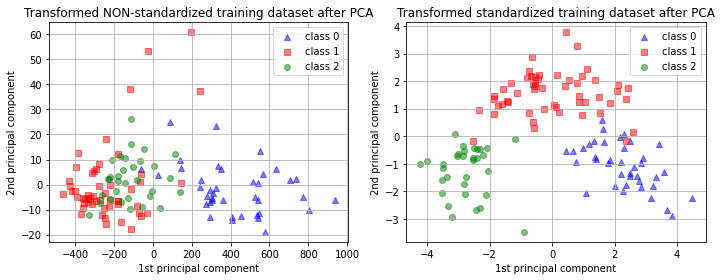

In [20]:
from matplotlib import pyplot as pyplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

range_y = tuple(set(y_train))

for l,c,m in zip(range_y, ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range_y, ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train_std==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

## Training a naive Bayes classifier

We will use a naive Bayes classifier for the classification task. If you are not familiar with it, the term 
"naive" comes from the assumption that all features are "independent".

All in all, it is a simple but robust classifier based on Bayes' rule

Bayes' Rule:

$$
P(\omega_j|x) = \frac{P(x|\omega_j) P(\omega_j)}{P(x)}
$$

where

- $\omega: class label$
- $P(\omega|x)$: posterior probability
- $P(x|\omega)$: prior probability (or likelihood)

and the **decision rule**:

Decide 

$\omega_{1}$ if $P(\omega_{1}|x) > P(\omega_{2}|x)$ 

else decide $\omega_{2}$ 
$$ 
\Rightarrow
\frac{P(x|\omega_{1}) P(\omega_{1})}{P(x)} >  \frac{P(x|\omega_{2})P(\omega_{2})}{P(x)} 
$$

In [21]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train_std)


## Evaluating the classification accuracy with and without standardization

In [22]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
81.45%

Prediction accuracy for the test dataset
64.81%



In [23]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
95.97%

Prediction accuracy for the test dataset
98.15%



As we can see, the standardization prior to the PCA definitely led to an increase in the empirical error rate on 
classifying samples from test dataset.